In [41]:
# Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the dataset
df = pd.read_csv('dataset/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [26]:
# drop unnecessary feature

df=df.drop(['RowNumber','CustomerId','Surname'],axis=1)

In [27]:
#Create dummy variables

geography=pd.get_dummies(df["Geography"],drop_first=True)
gender=pd.get_dummies(df['Gender'],drop_first=True)

In [28]:
# Concatenate the Data Frames

df=pd.concat([df,geography,gender],axis=1)

# Drop Unnecessary columns
df=df.drop(['Geography','Gender'],axis=1)

In [29]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [30]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [31]:
# Dividing dependent and independent variables

X=df.drop('Exited',axis=1)
y=df['Exited']

In [32]:
# Sampling

from imblearn.over_sampling import SMOTE 
from collections import Counter

sampler = SMOTE()
X_res, y_res = sampler.fit_resample(X, y)

print('SMOTE {}'.format(Counter(y_res)))

SMOTE Counter({1: 7963, 0: 7963})


In [33]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [34]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
#Create ANN

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=11, units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 10)



Epoch 1/10
800/800 [==============================] - 2s 2ms/step - loss: 0.4839 - accuracy: 0.7975
Epoch 2/10
800/800 [==============================] - 1s 2ms/step - loss: 0.4078 - accuracy: 0.8236
Epoch 3/10
800/800 [==============================] - 1s 2ms/step - loss: 0.3924 - accuracy: 0.8288
Epoch 4/10
800/800 [==============================] - 1s 1ms/step - loss: 0.3831 - accuracy: 0.8316
Epoch 5/10
800/800 [==============================] - 1s 2ms/step - loss: 0.3760 - accuracy: 0.8353
Epoch 6/10
800/800 [==============================] - 1s 2ms/step - loss: 0.3715 - accuracy: 0.8465
Epoch 7/10
800/800 [==============================] - 1s 1ms/step - loss: 0.3672 - accuracy: 0.8486
Epoch 8/10
800/800 [==============================] - 1s 1ms/step - loss: 0.3645 - accuracy: 0.8522
Epoch 9/10
800/800 [==============================] - 1s 1ms/step - loss: 0.3610 - accuracy: 0.8530
Epoch 10/10
800/800 [==============================] - 1s 2ms/step - loss: 0.3598 - accuracy: 0.8534

In [36]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)



63/63 [==============================] - 0s 1ms/step


In [38]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test, y_pred)
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.8575

In [43]:
# Accuracy = TP+TN/TP+FP+FN+TN
# Precision = TP/TP+FP
# Recall = TP/TP+FN
#F1 Score = 2*(Recall * Precision) / (Recall + Precision)


from sklearn.metrics import classification_report, confusion_matrix 
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1595
           1       0.76      0.43      0.55       405

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



In [44]:
confusion_m=confusion_matrix(y_test,y_pred )
confusion_m

array([[1540,   55],
       [ 230,  175]])

Text(50.722222222222214, 0.5, 'Actual Label')

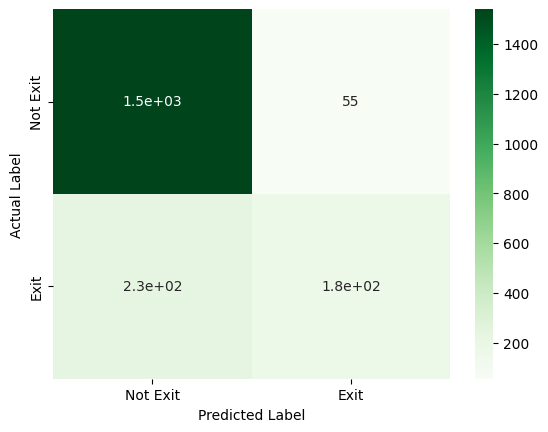

In [45]:
x_axis_labels = ['Not Exit','Exit']
y_axis_labels = ['Not Exit','Exit']

confusion_m=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_m, annot=True,cmap='Greens', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')